<a href="https://colab.research.google.com/github/davidclizbe/datascience/blob/master/Clizbe_Reg_Assump_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Day 26 Lecture 2 Assignment

In this assignment, we will learn about linear regression model assumptions

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [ ]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')

lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [ ]:
#answer below:
lager_data = lager.drop(['beer'], axis= 1)
lager_data.head()


,tpc,ma,dsa,asa,orac,rp,mca
0,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,146.03,11.72,0.64,0.90,3.18,0.47,9.39


Split the data into train and test subsets. Select 25% of the data to be in the test subset. Use `tpc` as the y variable.

In [ ]:
# answer below:
from sklearn.model_selection import train_test_split

X = lager_data.drop(['tpc'], axis=1) 

y = lager_data['tpc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

X_train.head()

,ma,dsa,asa,orac,rp,mca
18,9.56,0.51,0.16,0.03,0.73,29.67
1,10.96,0.63,0.64,2.85,0.41,15.47
37,6.83,0.80,1.51,7.10,0.83,48.83
12,11.70,0.42,1.32,1.02,0.60,35.83
17,11.04,0.70,1.87,1.05,0.94,61.89


In [ ]:
y_train.head()

18    152.96
1     160.38
37    212.48
12    143.50
17    230.25
Name: tpc, dtype: float64

Next, we'll generate a linear model and plot the residual vs. fit plot.

What are the coefficients, and what are their significance?

In [ ]:
#answer below:

import statsmodels.api as sm

model = sm.OLS(y_train, X_train)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    tpc   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              386.1
Date:                Tue, 26 May 2020   Prob (F-statistic):                    1.21e-22
Time:                        15:18:25   Log-Likelihood:                         -128.67
No. Observations:                  30   AIC:                                      269.3
Df Residuals:                      24   BIC:                                      277.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ma             3.4796      1.467      2.373      0.026       0.453       6.507
dsa           78.4016     41.997      1.867      0.074      -8.276     165.080
asa            6.5514     12.972      0.505      0.618     -20.222      33.325
orac          -0.6155      1.993     -0.309      0.760      -4.728       3.497
rp            95.5271     30.434      3.139      0.004      32.714     158.341
mca            0.3914      0.201      1.948      0.063      -0.023       0.806
==============================================================================
Omnibus:                       22.469   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.101
Skew:                          -1.686   Prob(JB):                     5.33e-09
Kurtosis:                       7.371   Cond. No.                         458.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Compute the VIF for all features in the model

In [ ]:
# answer below:



Plot the qq-plot for our errors (make sure to standardize the errors to compare to the standard normal distribtion):

In [ ]:
# answer below:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range (X.shape[1])], 
          index = X.columns)



const    23.896141
ma        1.527888
dsa       3.588777
asa       2.086996
orac      1.811524
rp        2.732758
mca       1.397685
dtype: float64

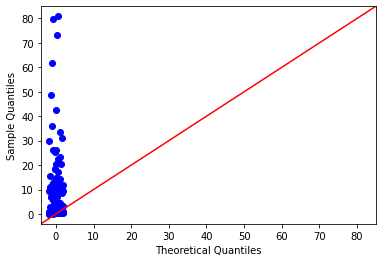

In [ ]:
import pylab

sm.qqplot(X, line = '45')
pylab.show()